In [1]:
import cvae

In [2]:
from cvae import cvae

In [3]:
from umap import UMAP

In [4]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1, cache=True)
# X = mnist.data

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
%matplotlib inline

mpl.rcParams.update({'font.size': 18})

In [5]:
import csv
import numpy as np

name = 'DualReconstructionProceduralImages0'

# with open('outputs/'+name+'/sample_latent_vectors'+name+'.csv') as csv_file:
#     csv_reader = csv.reader(csv_file, delimiter=',')
#     data = list(csv_reader)
#     data = data[1:]
#     latent = [list(map(float,item[0].replace('[','').replace(']','').strip(' ').split(','))) for item in data]
#     target = [int(item[1])for item in data]
    
with open('outputs/'+name+'/ordered_sample_latent_vectors'+name+'.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    data = list(csv_reader)
    data = data[1:]
    latent = [list(map(float,item[0].replace('[','').replace(']','').strip(' ').split(','))) for item in data]
    target = [int(item[2])for item in data]

In [6]:
# print(latent[0])
# print(target)
latent=np.array([np.array(i) for i in latent])
#latent=np.array(latent)
#print(latent[0:2])

In [7]:
#initialise
embedder = cvae.CompressionVAE(latent)

Total amount of data:  540
Input feature dimension:  192
Calculating normalisation factors.
Normalisation factors calculated.
Total amount of data:  60
Creating model.
Model created.
Setting up loss.
Loss set up.
Setting up session.
Session set up.
Trying to restore saved checkpoints from C:\Users\ljp1\Documents\MSci\Code\ConditionalVAE\temp ... No checkpoint found.
No model found to restore. Initialising new model.


In [8]:
#fit
embedder.train()

Starting queues.
Reader threads started.
step 0; epoch 0.00 - loss = 91.005, test_loss = 98.431, lr = 0.00100, (0.008 sec/step)
Storing checkpoint to C:\Users\ljp1\Documents\MSci\Code\ConditionalVAE\temp ... Done.
step 50; epoch 5.93 - loss = 79.415, test_loss = 75.156, lr = 0.00100, (0.000 sec/step)
step 100; epoch 11.85 - loss = 45.253, test_loss = 44.131, lr = 0.00100, (0.000 sec/step)
step 150; epoch 17.78 - loss = 44.929, test_loss = 40.883, lr = 0.00100, (0.000 sec/step)
step 200; epoch 23.70 - loss = 43.817, test_loss = 40.363, lr = 0.00100, (0.000 sec/step)
step 250; epoch 29.63 - loss = 41.423, test_loss = 39.834, lr = 0.00100, (0.000 sec/step)
step 300; epoch 35.56 - loss = 39.726, test_loss = 39.178, lr = 0.00100, (0.000 sec/step)
step 350; epoch 41.48 - loss = 36.674, test_loss = 38.233, lr = 0.00100, (0.000 sec/step)
step 400; epoch 47.41 - loss = 42.065, test_loss = 38.087, lr = 0.00100, (0.000 sec/step)
step 450; epoch 53.33 - loss = 39.496, test_loss = 38.225, lr = 0.00

In [9]:
#embed
z = embedder.embed(latent)

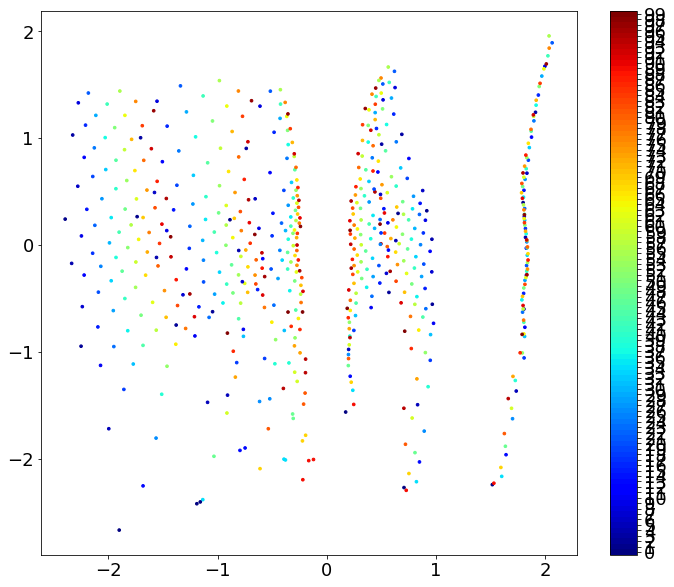

In [10]:
#visualise
embedder.visualize(z, labels=[int(label) for label in target])


In [11]:
fit = umap.UMAP()
%time u = fit.fit_transform(latent)

Wall time: 4.21 s


In [12]:
# fig, ax = plt.subplots(1, 1, figsize=(12, 10), facecolor='w', edgecolor='k')

# cmap = plt.get_cmap('jet', np.max(target) - np.min(target) + 1)
# s = ax.scatter(u[:, 0], u[:, 1], s=7, c=target, cmap=cmap, vmin=np.min(target) - .5,
#                    vmax=np.max(target) + .5)
# cax = plt.colorbar(s, ticks=np.arange(np.min(target), np.max(target) + 1))

In [13]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(latent);
    if n_components == 1:
        fig, ax = plt.subplots(1, 1, figsize=(12, 10), facecolor='w', edgecolor='k')

        cmap = plt.get_cmap('jet', np.max(target) - np.min(target) + 1)
        s = ax.scatter(u[:, 0], s=7, c=target, cmap=cmap,
                       vmin=np.min(target) - .5,
                       vmax=np.max(target) + .5)
        cax = plt.colorbar(s, ticks=np.arange(np.min(target), np.max(target) + 1))
    if n_components == 2:
        fig, ax = plt.subplots(1, 1, figsize=(12, 10), facecolor='w', edgecolor='k')

        cmap = plt.get_cmap('jet', np.max(target) - np.min(target) + 1)
        s = ax.scatter(u[:, 0], u[:, 1], s=7, c=target, cmap=cmap,
                       vmin=np.min(target) - .5,
                       vmax=np.max(target) + .5)
        cax = plt.colorbar(s, ticks=np.arange(np.min(target), np.max(target) + 1))
    if n_components == 3:
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')

        cmap = plt.get_cmap('jet', np.max(target) - np.min(target) + 1)
        s = ax.scatter(u[:, 0], u[:, 1], u[:, 2], s=7, c=target, cmap=cmap,
                       vmin=np.min(target) - .5,
                       vmax=np.max(target) + .5)
        cax = plt.colorbar(s, ticks=np.arange(np.min(target), np.max(target) + 1))
    plt.title(title, fontsize=16)
    plt.show()

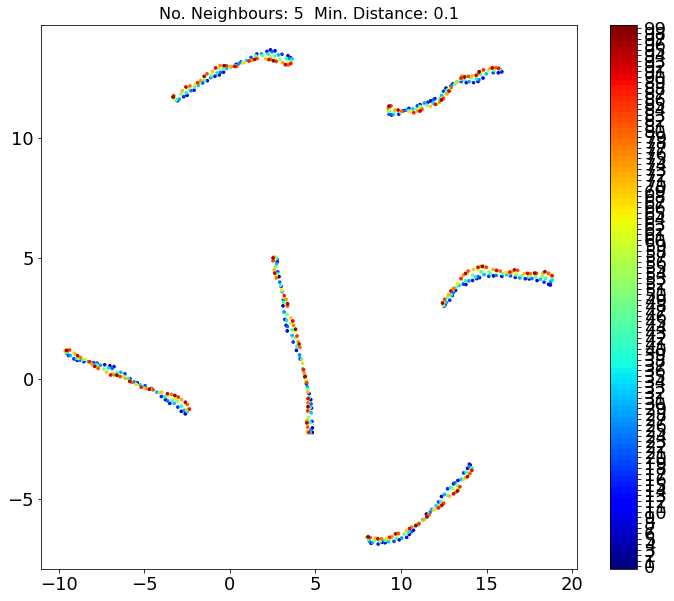

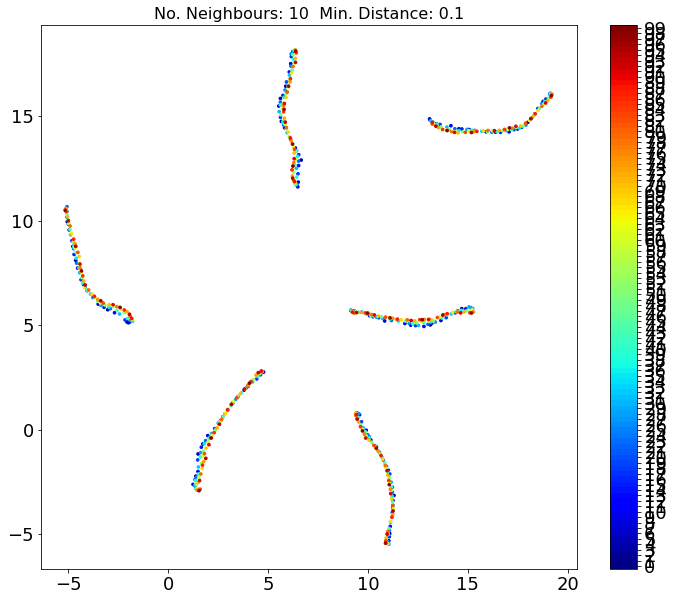

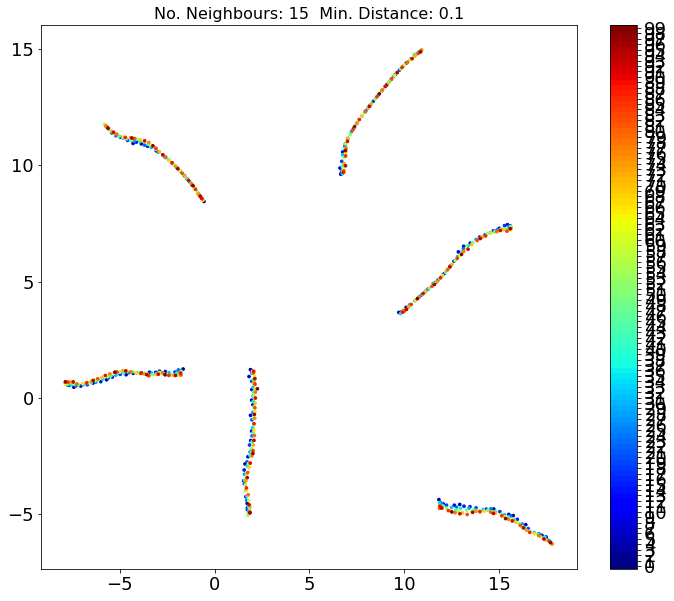

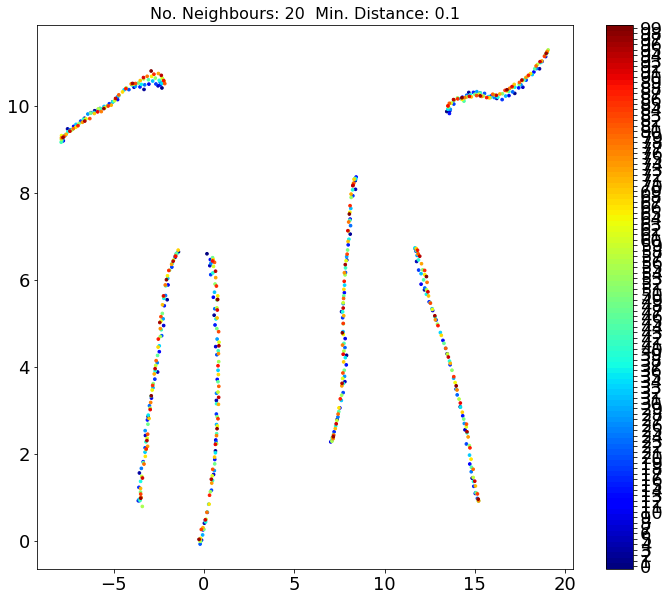

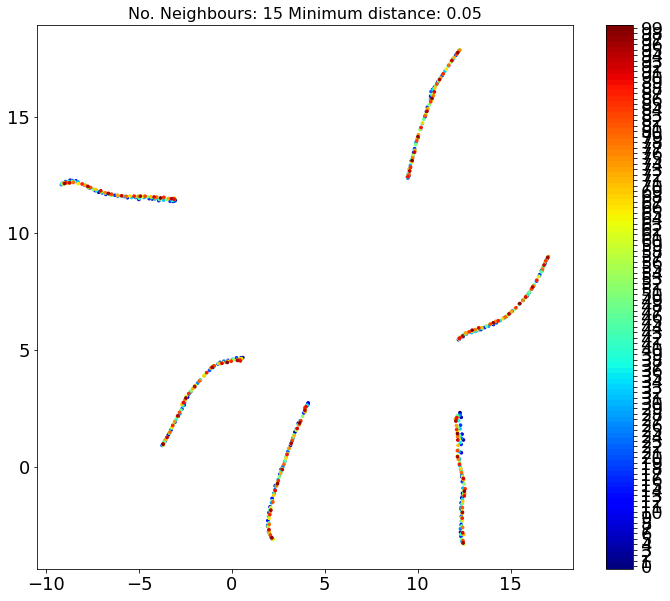

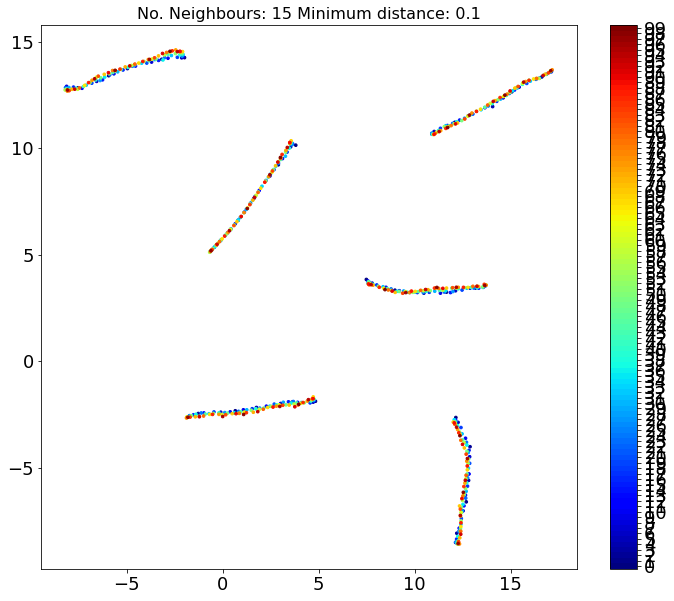

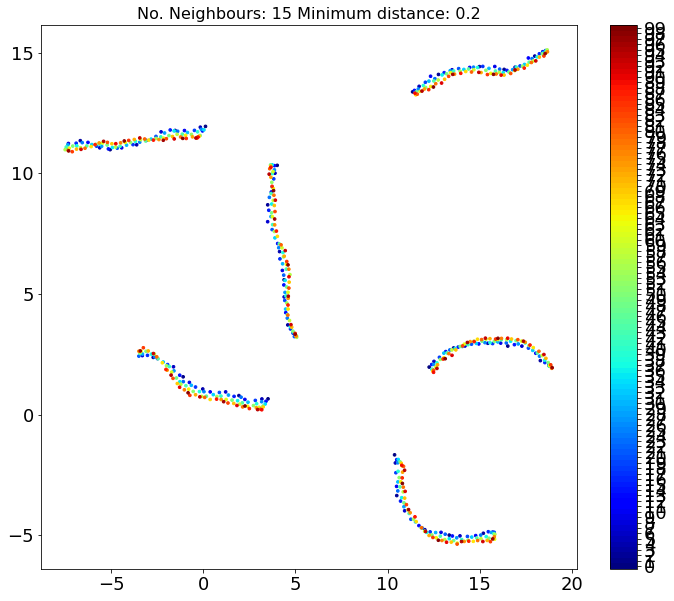

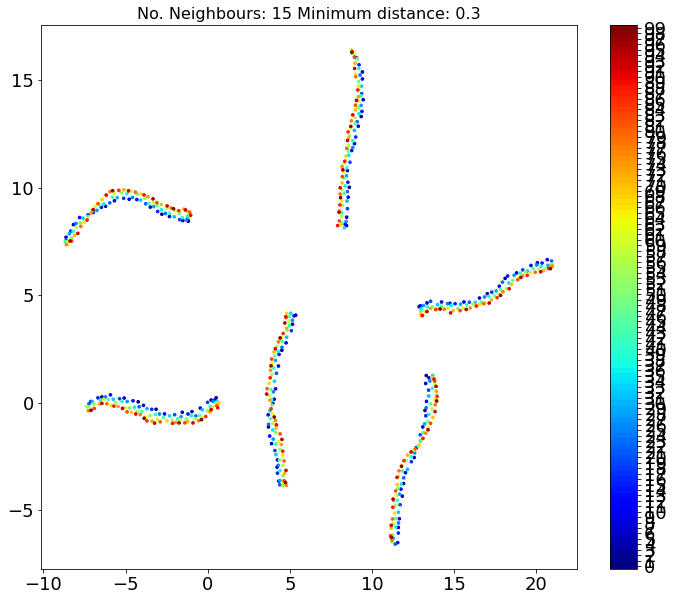

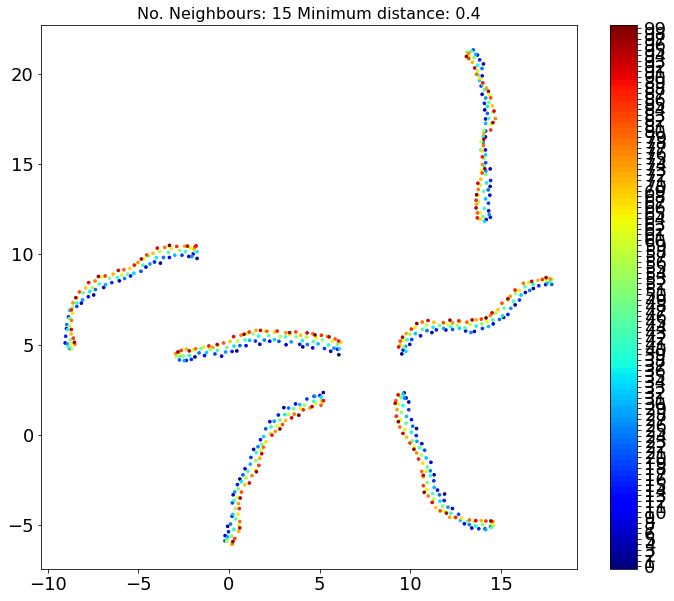

In [14]:
for i in range (5,25,5):
    draw_umap(n_neighbors=i, min_dist=0.1, n_components=2, title=f'No. Neighbours: {i}  Min. Distance: 0.1')

for j in [0.05,0.1,0.2,0.3,0.4]:
    draw_umap(n_neighbors=15, min_dist=j, n_components=2, title=f'No. Neighbours: {15} Minimum distance: {j}')

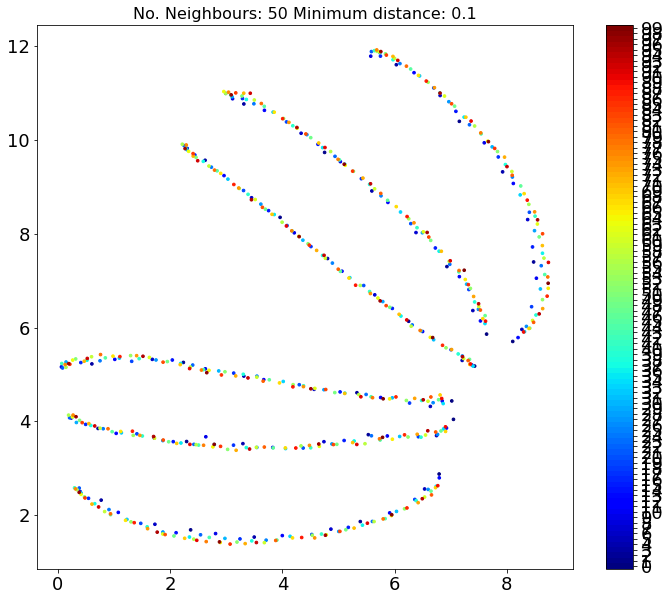

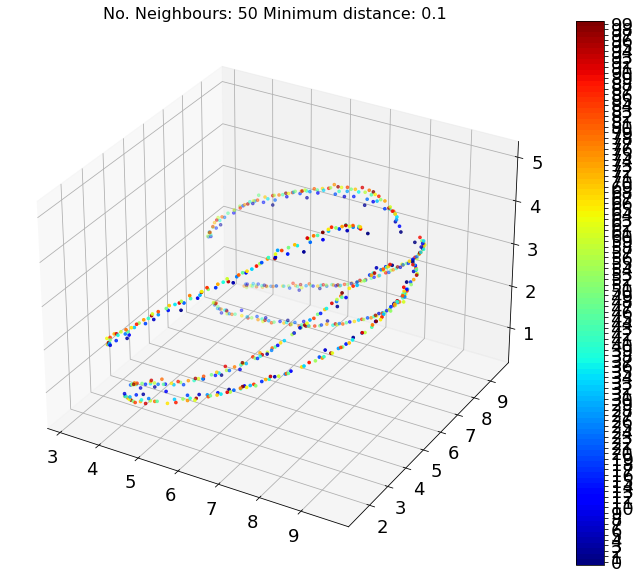

In [15]:
n=50
d=0.1
draw_umap(n_components=2, n_neighbors=n, min_dist=d, title=f'No. Neighbours: {n} Minimum distance: {d}')
draw_umap(n_components=3, n_neighbors=n, min_dist=d, title=f'No. Neighbours: {n} Minimum distance: {d}')

In [16]:
# sns.set(style='white', rc={'figure.figsize':(14,14)})
# sns.color_palette("tab10", as_cmap=True)

In [17]:
# cmap = mpl.cm.tab10
# bounds = [0, 1, 2, 3, 4, 5]
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

# # plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='horizontal',
# #              label="Discrete intervals with extend='both' keyword")

# plt.scatter(u[:,0], u[:,1], c=target, s=2, cmap=cmap)

# plt.colorbar()